# Fitting SIR for France

In [1]:
from __future__ import division # always-float division
import numpy as np
import pandas as pd
import glob
import pprint
import os
import requests
from datetime import date

# Easy interactive plots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Interactive plots in notebook
from IPython.display import HTML, Image, display
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed, Checkbox

# Maths
from scipy.integrate import odeint
import scipy.signal.windows as window
from sklearn.preprocessing import normalize
import scipy.stats as stats

# Long computations
from tqdm import tqdm_notebook as tqdm
import pickle

# Fitter
from lmfit import Model, Parameters, Parameter, report_fit, minimize

#Import from utils
from utils import *

import matplotlib.pyplot as plt

In [2]:
from utils import *
import glob

# Interactive plot layout options
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [3]:
# Relative path to EPI data folder
DATA_PATH = './data/clean/EPI'

# Studied country for OWID data
COUNTRY = 'France'
DEATHS_FILE = 'total_deaths_10juillet2020.csv'

# Display static (png) plots or interactive plotly (js) figures
STATIC_PLOTS = True

In [4]:
# Download OWID & Santé Publique data, write new file if new date
existing = glob.glob(DATA_PATH+"/*"+str(date.today())+".csv")

In [5]:
owid_file = update_owid(DATA_PATH)

Downloaded Our World In Data Coronavirus data to 
	./data/clean/EPI/owid_2021-04-02.csv


# Model fitting

## Fitting beta with stringency

In [6]:
from EPI_model import EPIfit

In [32]:
params_sir_beta_s = './params_new/params_SIR_beta_strin.csv'

In [34]:
owid_file

'./data/clean/EPI/owid_2021-04-02.csv'

In [ ]:
name;init_value;min;max
Cs;5.0;2.0;6.0
Ls;80.80;0.0;100.0
as;0.35;0.24;3.0
bs;50.0;20.0;100.0
C;0.355;0.355;0.38
L;-0.23;-0.23;-0.2
b;69.990953;68.9;75.0
gamma;0.05;0.0;0.2


In [145]:
SIR = EPIfit(model='SIR', beta_sigmoid_step=True, mu_sigmoid_step=False, stringency_fit=True, PARAMS_FILE=params_sir_beta_s, OWID_FILE=owid_file,
                  HOSP_FILE=None, cutoff_date='2020-05-10', ratio_susceptible=1/1)

Params for stringency fit: Parameters([('Cs0', <Parameter 'Cs0', value=5.0, bounds=[2.0:6.0]>), ('Ls0', <Parameter 'Ls0', value=80.8, bounds=[0.0:100.0]>), ('as0', <Parameter 'as0', value=0.35, bounds=[0.235:3.0]>), ('bs0', <Parameter 'bs0', value=50.0, bounds=[20.0:100.0]>)])
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Cs0         6        2        6    1.171     True     None     None
Ls0     81.58        0      100    2.324     True     None     None
as0     0.235    0.235        3  0.01774     True     None     None
bs0     44.65       20      100   0.4807     True     None     None


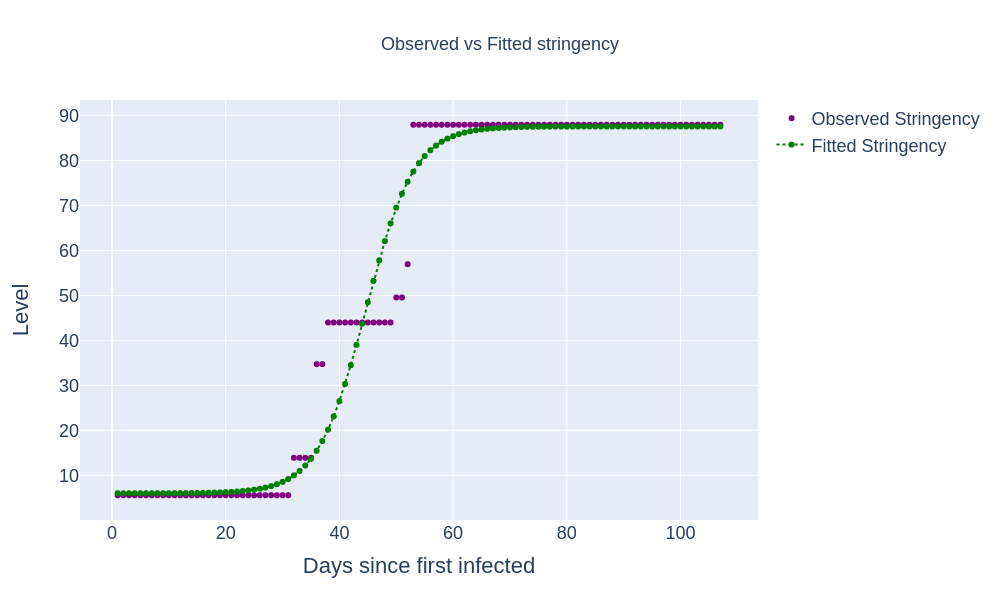

Fitting France data with 0 last days out
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 118
    # data points      = 107
    # variables        = 4
    chi-square         = 2.0659e+10
    reduced chi-square = 2.0057e+08
    Akaike info crit   = 2049.40943
    Bayesian info crit = 2060.10074
##  Warning: uncertainties could not be estimated:
    C_0:    at initial value
    C_0:    at boundary
    L_0:    at initial value
    L_0:    at boundary
    b_0:    at boundary
    gamma:  at boundary
[[Variables]]
    C_0:    0.35800000 (init = 0.358)
    L_0:   -0.21200000 (init = -0.212)
    a_0:    0.235 (fixed)
    b_0:    68.9000000 (init = 69.99095)
    gamma:  0.20000000 (init = 0.05)
None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
C_0       0.358    0.358     0.38     None     True     None     None
L_0      -0.212   -0.212     -0.2     None     True     None     None
a_0       0.235    0.235    0.335     None    False     None 

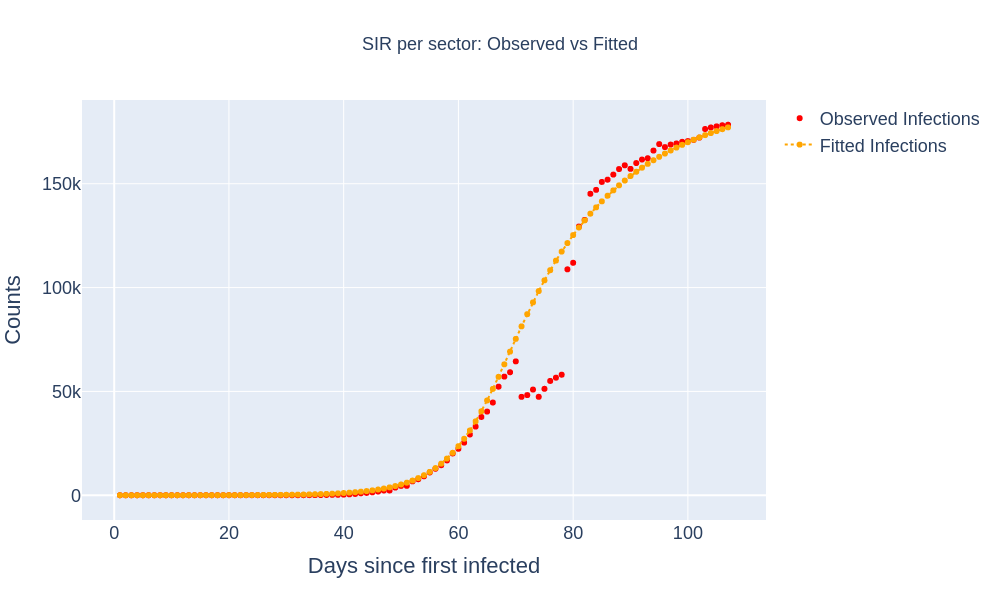

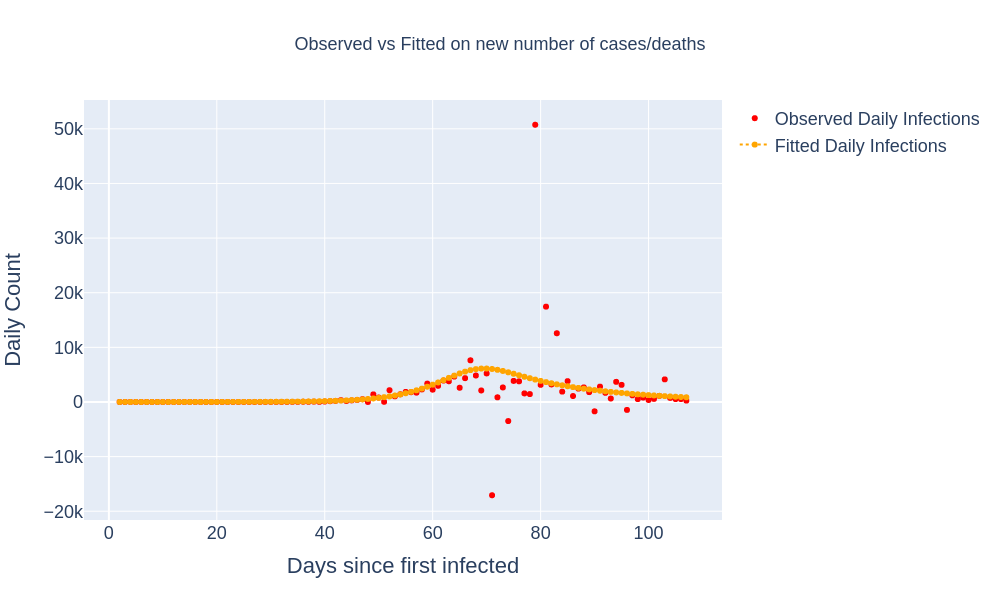

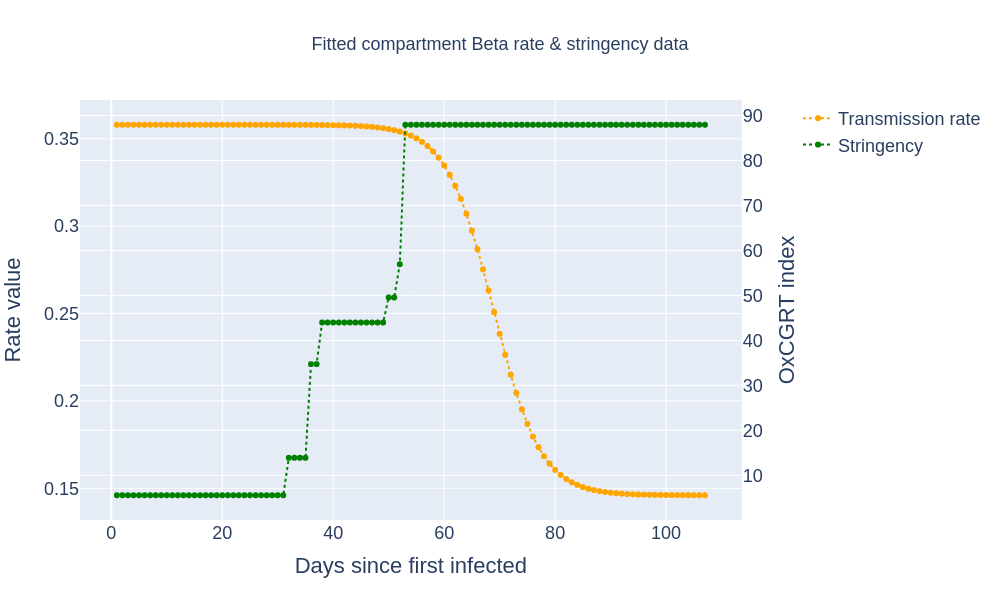

In [146]:
d, r, n, fitted = SIR.fit(country='France', out_days=0, plot=True, disease_vary=True, sector_props=[100.0], STATIC_PLOTS=True)

## No stringency

In [147]:
params_sir = './params_new/params_SIR.csv'

In [155]:
SIR = EPIfit(model='SIR', beta_sigmoid_step=False, mu_sigmoid_step=False, stringency_fit=False, PARAMS_FILE=params_sir, OWID_FILE=owid_file,
                  HOSP_FILE=None, cutoff_date='2020-05-10', ratio_susceptible=1/350)

Fitting France data with 0 last days out
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 107
    # variables        = 2
    chi-square         = 9.4134e+09
    reduced chi-square = 89651462.4
    Akaike info crit   = 1961.30516
    Bayesian info crit = 1966.65082
[[Variables]]
    beta:   0.21655356 +/- 0.00945395 (4.37%) (init = 0.26)
    gamma:  0.06035009 +/- 0.00935734 (15.51%) (init = 0.05)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, gamma) =  0.998
None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
beta     0.2166        0     0.26 0.009454     True     None     None
gamma   0.06035        0     0.15 0.009357     True     None     None
107 fitted days out of 107 available data points


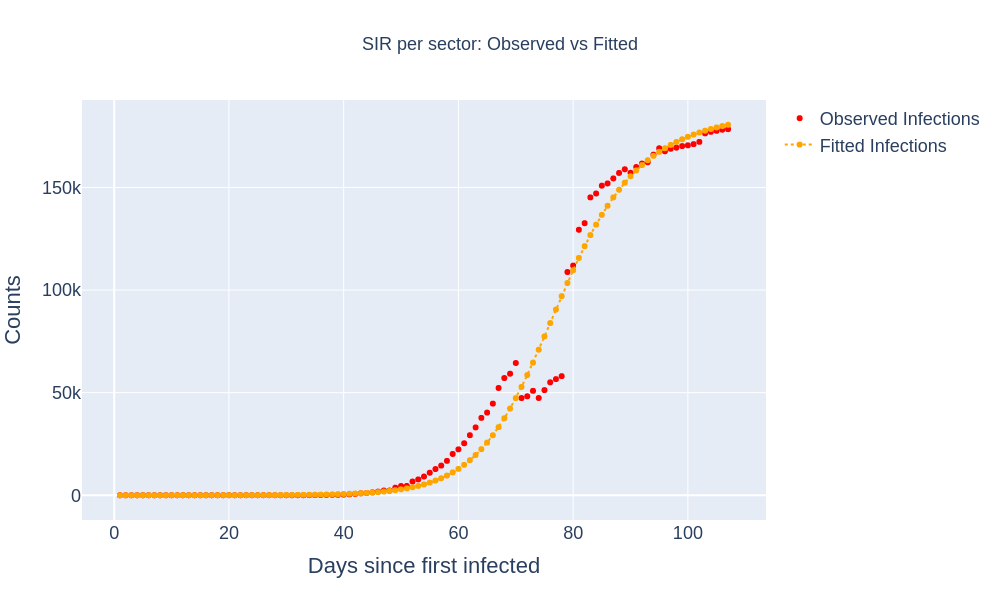

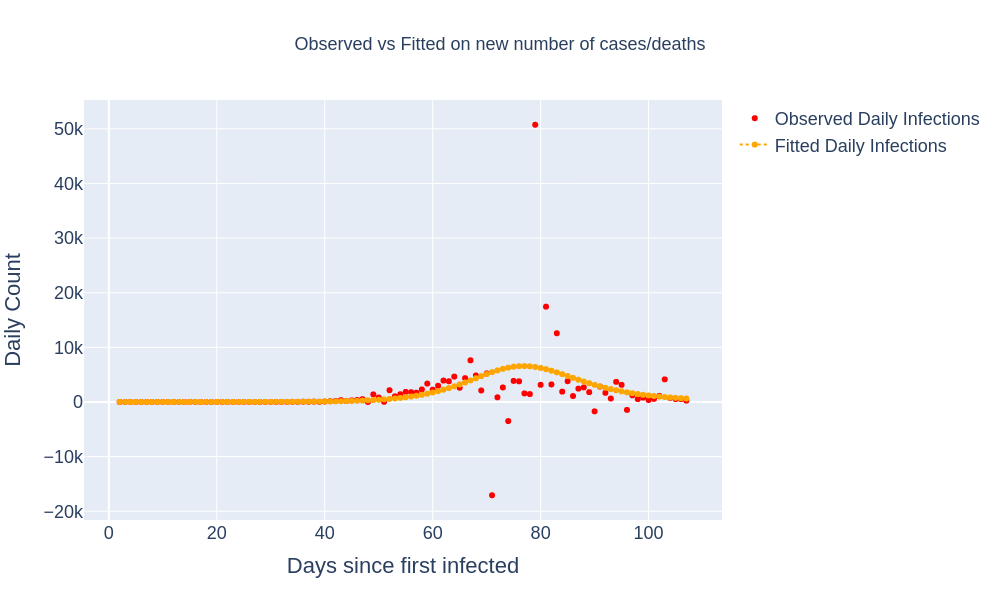

In [156]:
d, r, n, fitted = SIR.fit(country='France', out_days=0, plot=True, disease_vary=True, sector_props=[100.0], STATIC_PLOTS=True)